# Librairies Python pour la data science

* Cours openclassrooms : <https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science>
* A propos de Git : <http://marklodato.github.io/visual-git-guide/index-en.html>

## Module Python et Jupyter

* Pour créer un module Python : sur la page d'accueil de Jupyter : Nouveau/fichier texte. Enregistrer en `.py` et on peut ensuite l'importer dans un notebook. Il faut que le fichier soit dans le même répertoire que le notebook.
* Faire une docstring permet d'avoir une documentation à l'appel de `help()`
* Pour faire apparaitre la documentation d'une fonction, faire `Shift + Tab` lorsque le curseur est sur le nom de la fonction ou dans la parenthèse. On peut `Shift + Tab + Tab * x fois` pour avoir différentes vues.

## Problème de Monty Hall

L'exposé du problème est plutôt simple. Imaginez un jeu télévisé où il y a trois portes sur le plateau de jeu. Seule une de ces portes cache un trésor. Il n'y a rien derrière les deux autres portes. Rien ne permet de savoir quelle porte cache le trésor.

La tâche du joueur consiste à choisir parmi les trois portes celle qu'il veut ouvrir. Il aura droit au trésor s'il choisit la bonne porte, et rien sinon. Pour faire son choix, il n'a aucune information. Il doit donc simplement s'en remettre au hasard.

Jusqu'ici, le problème n'a rien de remarquable. Mais il y a un twist ! Une fois que le joueur a fait son choix, mais avant d'ouvrir la porte, le présentateur élimine, parmi les deux portes non choisies, une porte qui ne contient pas de trésor. Si les deux portes restantes ne contiennent rien, le présentateur élimine simplement une d'entre elles au hasard.

Le joueur doit alors faire un nouveau choix. Il peut soit choisir d'ouvrir la première porte qu'il avait choisie, soit changer pour la porte non éliminée par le présentateur. La question est, qu'a-t-il intérêt à faire ?

### Génération d'une partie

In [1]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

In [2]:
# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2

In [3]:
# fonction seed() sans argument utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

# Une partie
def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

In [4]:
print(play_game(Strategie.CHANGER))

False


### Simulation de plusieurs parties

In [5]:
# Nombre de parties définies par l'utilisateur
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

### Analyse des résultats

In [6]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

En changeant de porte, le joueur a gagné 6575 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3297 sur 10000 parties.


#### Fonction `plot`

* permet de tracer des lignes

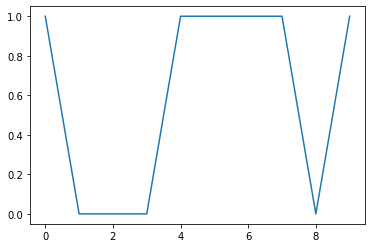

In [7]:
# plot renvoie un objet, que l'on pourra manipuler plus tard pour
# personnaliser le graphique
plot = plt.plot(play(Strategie.CHANGER, 10))

#### Fonction  `scatter`

* permet de tracer des points

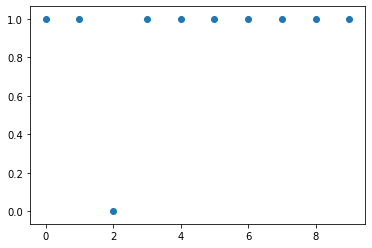

In [8]:
plot = plt.scatter(range(10), play(Strategie.CHANGER, 10))

#### Fonction `bar`

* premier argument : coordonnées des barres
* deuxième : hauteur des barres, dans une liste 
* `tick_label` pour le lable des barres 

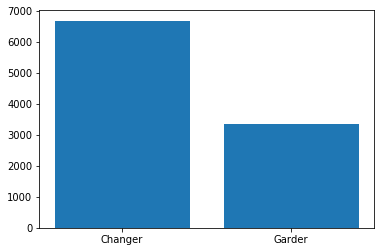

In [9]:
plot = plt.bar([1, 2],
               [sum(play(Strategie.CHANGER, 10000)), sum(play(Strategie.GARDER, 10000))], 
               tick_label = ["Changer", "Garder"])

#### Relation entre nombre de parties et gains

* `plt.figure()` crée un graphique, les appels suivants à `plt.plot()` ou `plt.scatter()` ajoute les plots au graphique.

In [10]:
gains_changer = []
gains_garder = []
samples =  [100, 1000, 2000, 5000, 8000, 10000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

# Dans gains_changer il y a 6 listes : 
#  - la première de taille 100 avec des 1 pour les parties gagnées, des 0 pour les perdues
#  - la deuxième de taille 1000 avec 1 et 0
#  - etc.
#
# Pour avoir la somme des parties gagnées pour les 6 simulations : 
print([sum(x) for x in gains_changer])
print([sum(x) for x in gains_garder])

[68, 678, 1351, 3281, 5441, 6722]
[34, 322, 698, 1687, 2665, 3333]


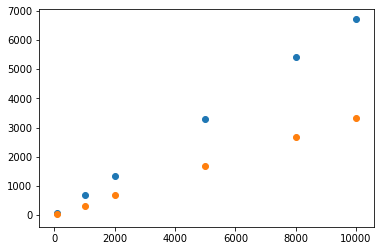

In [11]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])

## Numpy

### Documentation

* <https://numpy.org/doc/stable/user/>

### Loi normale



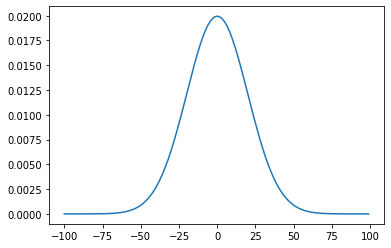

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp

domaine = range(-100,100)
mu = 0
sigma = 20

# Notez l'utilisation du mot clé lambda. Il est très bien expliqué dans le cours
# "Apprenez à programmer en Python" sur OpenClassrooms.
f = lambda x : 1/(sqrt(2*pi*pow(sigma,2))) * exp(-pow((x-mu),2)/(2*pow(sigma,2)))

y = [f(x) for x in domaine]
plot = plt.plot(domaine, y)

### Théorème centrale limite

#### Générer des réalisations de variables aléatoires avec Numpy

* fonction `np.random.rand()` pour génération de nombre aléatoire
* si un deuxième argument, construit une matrice
* accès à un élément de la matrice comme pour les listes. Exemple : les 3 premières lignes et toutes les colonnes : `matrice[0:2][:]`

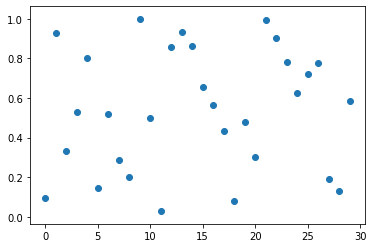

In [13]:
vecteur_aleatoire = np.random.rand(30)
plot = plt.scatter(range(30), vecteur_aleatoire)

In [14]:
# Pour une matrice de nombre aléatoire
matrice_aleatoire_a_imprimer = np.random.rand(3, 5)
print(matrice_aleatoire_a_imprimer)
print("___\nJuste la deuxième ligne : ")
print(matrice_aleatoire_a_imprimer[1][:])
print("___\nJuste le premier élément : ")
print(matrice_aleatoire_a_imprimer[0][0])

[[0.6219246  0.94515343 0.82142439 0.87670784 0.52072186]
 [0.37256073 0.16942075 0.94261641 0.22785122 0.28919384]
 [0.50894789 0.66236999 0.77873271 0.33092818 0.09981897]]
___
Juste la deuxième ligne : 
[0.37256073 0.16942075 0.94261641 0.22785122 0.28919384]
___
Juste le premier élément : 
0.6219245969604041


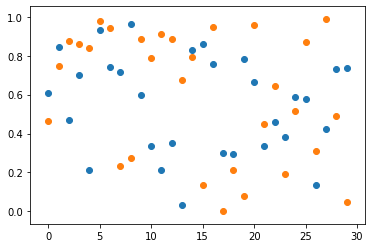

In [15]:
matrice_aleatoire_a_grapher = np.random.rand(2, 30)
fig = plt.figure()
# la première ligne
plot1 = plt.scatter(range(30), matrice_aleatoire_a_grapher[0,:])
# la deuxième
plot2 = plt.scatter(range(30), matrice_aleatoire_a_grapher[1,:])

#### Opérations de base sur les matrices

* `np.sum()` somme de tous les éléments de la matrice. Si argument `axis = 0` : somme les colonnes, si `axis = 1` somme les lignes
* prorpiété `shape` pour avoir la taille de la matrice. Renvoie un *tuple* avec (nb_lignes, nb_colonnes). Si c'est une matrice avec une seule ligne ou colonne, renvoie (nb_éléments, ).

In [16]:
# Nous allons considérer 100 variables aléatoires, 
# chacune avec 200 échantillons.
matrice_aleatoire = np.random.rand(100, 200)

sommes = np.sum(matrice_aleatoire, axis = 0)

print("La taille de la variable sommes est {}.".format(sommes.shape))

La taille de la variable sommes est (200,).


#### Visualisation

* histogramme avec `plt.hist()`

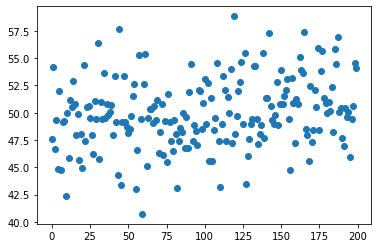

In [17]:
plot = plt.scatter(range(200), sommes)

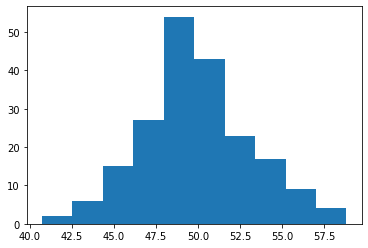

In [18]:
plot = plt.hist(sommes)

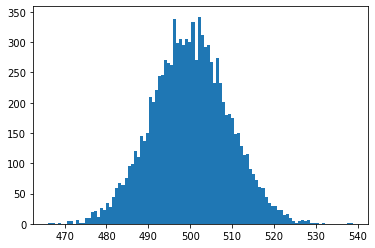

In [19]:
# Avec d'avantage d'échantillons
matrice_aleatoire = np.random.rand(1000, 10000)
sommes = np.sum(matrice_aleatoire, 0)
plot = plt.hist(sommes, bins = 100)

#### Calculer les propriétés d'un échantillon

* `np.mean()` pour la moyenne
* `np.var` pour la variance

In [20]:
# La moyenne de notre distribution est égale à la somme des moyennes des distributions 
# qui la composent. La variance est la somme des variances des distributions qui composent
# notre distribution. Attention, ces propriétés ne sont valables que parce que les
# distributions sont indépendantes.
print("La moyenne empirique de notre distribution est {}."
      .format(np.mean(sommes)))
print("La moyenne empirique de la variable généré par la fonction rand est {}."
      .format(np.mean(np.random.rand(100000))))
print("La variance empirique de notre distribution est {}."
      .format(np.var(sommes)))
print("La variance empirique de la variable généré par la fonction rand est {}."
      .format(np.var(np.random.rand(100000))))

La moyenne empirique de notre distribution est 499.9740590751231.
La moyenne empirique de la variable généré par la fonction rand est 0.5005430782113143.
La variance empirique de notre distribution est 83.90026646150598.
La variance empirique de la variable généré par la fonction rand est 0.08307604189669386.


### Problème de Monty-Hall avec Numpy

In [21]:
plt.style.use('seaborn-whitegrid')

N_TRIALS = 1000

# Suite d'entiers entre 0 et 2
prizes = np.random.randint(0, 3, size = (N_TRIALS))
first_choices = np.random.randint(0, 3, size = (N_TRIALS)) 

# Si le joueur change de porte, il ne gagne que si son premier choix n'était pas le bon
switching_player_gains = (prizes != first_choices).astype(int)
keeping_player_gains = (prizes == first_choices).astype(int)

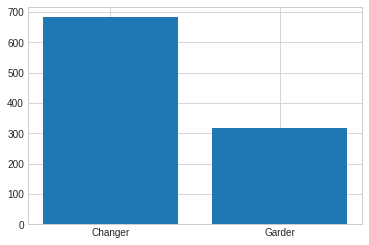

In [22]:
plot = plt.bar([1, 2],
               [switching_player_gains.sum(), keeping_player_gains.sum()],
               tick_label = ["Changer","Garder"])

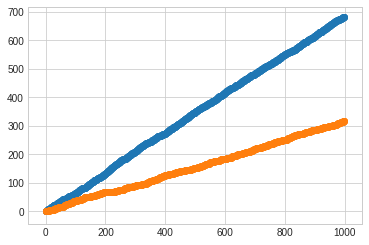

In [23]:
figure = plt.figure()
plot = plt.scatter(range(N_TRIALS), switching_player_gains.cumsum())
plot = plt.scatter(range(N_TRIALS), keeping_player_gains.cumsum())

### Les *array* Numpy

* Un array est un tableau contenant des **valeurs de même type**

#### Converion d'objets Python

* création à partir d'une liste ou tupple avec la foncion `array(object)`. 
* On peut spécifier explicitement le type avec l'argument `dtype`. Sinon Numpy essaye de convertir. Voir <https://numpy.org/doc/stable/user/basics.types.html> pour les détails sur les types Numpy.

In [24]:
# Tableau d'entiers:
A = np.array([1, 4, 2, 5, 3])

# Convertit tout le monde en float
B = np.array([3.14, 4, 2, 3])

# on peut spécifier manuellement le type
C = np.array([1, 2, 3, 4], dtype='float32')

print(A)
print(B)
print(C)

[1 4 2 5 3]
[3.14 4.   2.   3.  ]
[1. 2. 3. 4.]


In [25]:
# Une liste de listes est transformée en un tableau multi-dimensionnel
print([range(i, i + 3) for i in [2, 4, 6]])

A = np.array([range(i, i + 3) for i in [2, 4, 6]])
print(A)

[range(2, 5), range(4, 7), range(6, 9)]
[[2 3 4]
 [4 5 6]
 [6 7 8]]


#### Création direct d'array NumPy

* `zeros(shape)` pour une matrice de zéros. `shape` est soit un *int* et alors création d'un array uni-dimensionnel (<=> vecteur) ou un *tupple d'int* et alors création d'un array de dimension (nrow, ncol). 
* `ones(shape)` matrice de 1
* `eye(N)` pour la matrice identité
* `full(shape, fill_value)` pour matrice avec toujours la même valeur `fill_value`
* `arange([start,] stop[, step,])` pour une séquence linéaire
* `linspace()` pour séquence espacée uniformément

In [26]:
# Un tableau de longueur 10 (<=> vecteur), rempli d'entiers qui valent 0
A = np.zeros(10, dtype=int)
B = np.zeros((5, 10), dtype=int)
print(A)
print(B)

[0 0 0 0 0 0 0 0 0 0]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [27]:
# Un tableau de taille 3x5 rempli de nombres à virgule flottante de valeur 1
np.ones((3, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [28]:
# Un tableau 3x5 rempli de 3,14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [29]:
# Un tableau rempli d'une séquence linéaire
# commençant à 0 et qui se termine à 20 exclu, avec un pas de 2
# avec des arguments entiers, c'est équivalent à range() mais renvoie un ndarray à la place
print(np.arange(0, 20, 2))

print(np.arange(10))

# Si on veut utiliser un step float, il faut mieux utiliser linspace()

[ 0  2  4  6  8 10 12 14 16 18]
[0 1 2 3 4 5 6 7 8 9]


In [30]:
# Un tableau de 5 valeurs, espacées uniformément entre 0 et 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [31]:
# La matrice identité de taille 3x3 
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Propriétés des *array*

* le nombre de dimensions : `.ndim`
* la forme (<=> nombre de lignes, nombre de colonnes) : `.shape`
* la taille (<=> nombre d'éléments) : `.size`
* le type : `.dtype`
* la transposée : `.T`

In [32]:
A = np.random.randint(10, size=6)  # Tableau de dimension 1
print("nombre de dimensions de A: ", A.ndim)
print("forme de A: ", A.shape)
print("taille de A: ", A.size)
print("type de A: ", A.dtype)

B = np.zeros((3, 5))
print("nombre de dimensions de B: ", B.ndim)
print("forme de B: ", B.shape)
print("taille de B: ", B.size)
print("type de B: ", B.dtype)

C = np.array([[1, 2, 3], [4, 4, 4]])
print(C)
print(C.T)

nombre de dimensions de A:  1
forme de A:  (6,)
taille de A:  6
type de A:  int64
nombre de dimensions de B:  2
forme de B:  (3, 5)
taille de B:  15
type de B:  float64
[[1 2 3]
 [4 4 4]]
[[1 4]
 [2 4]
 [3 4]]


### Indexation et slicing

#### Accès à un seul élément

* Si de dimension 1, accès au premier élément avec `A[0]`, au dernier avec `A[-1]`
* Si de dimension 2, `B[0, 0]` renvoie l'élément en haut à gauche, `B[-1, -1]` celui en bas à droite
* array est mutable : on peut modifier les valeurs

In [33]:
print(A)

# Pour accéder au premier élément
print(A[0])

# Pour accéder au dernier élément
print(A[-1])

[1 5 3 3 6 7]
1
7


In [34]:
# Tableau de dimension 2
B = np.random.randint(10, size=(3, 4)) 
print(B)

# première ligne, première colonne
print(B[0, 0])

# première ligne, dernière colonne
print(B[0, -1])

# dernière ligne, dernière colonne
print(B[-1, -1])

[[6 1 6 0]
 [0 0 4 9]
 [9 4 7 7]]
6
0
7


In [35]:
# On peut modifier les valeurs
A[1] = "1000"
print(A)

# Attention au type
A[1] = 3.14
print(A)

[   1 1000    3    3    6    7]
[1 3 3 3 6 7]


#### Accès à plusieurs éléments

* en combinant les `[]` et `:`, avec la règle `[debut:fin:pas]`.
* `debut` peut être omis si on veut commencer au début de la liste (c'est à dire si début = 0)
* `fin` peut être omis si on veut aller jusqu'au bout de la liste (c'est à dire fin = -1 ou fin = len(liste)) 
* `pas`, ainsi que le dernier `:`, peuvent être omis si le pas est de 1 (-1 si la fin est inférieure au début)

In [36]:
# pour un array 1D
print(A)

# Les cinq premiers éléments
print(A[:5]) 

# Les éléments à partir de l'index 5
print(A[5:])  

# Un élément sur deux
print(A[::2])

# si le pas est négatif, le début et la fin du slice sont inversés
print(A[::-1])

[1 3 3 3 6 7]
[1 3 3 3 6]
[7]
[1 3 6]
[7 6 3 3 3 1]


In [37]:
# pour array 2D, c'est pareil
print(B)

# la première ligne
print(B[0, :])

# la première colonne
print(B[:, 0])

# le carré en haut à gauche
print(B[0:2, 0:2])

[[6 1 6 0]
 [0 0 4 9]
 [9 4 7 7]]
[6 1 6 0]
[6 0 9]
[[6 1]
 [0 0]]


#### Concaténation

* pour array 1D : avec `np.concatenate()`
* pour array 2D : 
    + verticalement avec `np.vstack()` 
    + horizontalement avec `np.hstack()`

In [38]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [39]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [40]:
z = np.array([[1, 1],
              [2, 2]])

np.hstack([z, grid])

array([[1, 1, 9, 8, 7],
       [2, 2, 6, 5, 4]])

### Opérations sur les array NumPy

#### Fonctions universelles

* on peut effectuer les opérations de base sur chaque élément de l'array
* on peut aussi appliquer les fonctions NumPy sur les listes Python
* voir <https://numpy.org/doc/stable/reference/ufuncs.html> pour la liste des fonctions universelles NumPy

In [41]:
# Il y a tout d'abord des opération mathématiques simples
X = np.array([[1, 2, 3],
              [4, 5, 6]])
print(X)
print(X + 5)
print(X - 5)
print(X * 2)
print(X / 2)
print(X // 2)  # Division entière

[[1 2 3]
 [4 5 6]]
[[ 6  7  8]
 [ 9 10 11]]
[[-4 -3 -2]
 [-1  0  1]]
[[ 2  4  6]
 [ 8 10 12]]
[[0.5 1.  1.5]
 [2.  2.5 3. ]]
[[0 1 1]
 [2 2 3]]


In [42]:
# appliquer une fonction ) un array
x = [-2, -1, 1, 2]
print("La valeur absolue: ", np.abs(x))
print("Exponentielle: ", np.exp(x))
print("Logarithme: ", np.log(np.abs(x)))

La valeur absolue:  [2 1 1 2]
Exponentielle:  [0.13533528 0.36787944 2.71828183 7.3890561 ]
Logarithme:  [0.69314718 0.         0.         0.69314718]


#### Opérations booléennes

* on peut utiliser les opérateurs booléens python, le calcul est réalisé élément par élément
* fonction `np.where(bool_array)` qui retourne les indices des éléments True 

In [43]:
print(X >= 3)

print(np.where(X >= 3))

[[False False  True]
 [ True  True  True]]
(array([0, 1, 1, 1]), array([2, 0, 1, 2]))


En fait, si on utilise seulement un seul argument avec `where()`, la doc NumPy recommande plutôt d'utiliser `nonzero()` qui renvoie les indices des éléments différents de 0. Donc si array de booléens, les indices des éléments *True*.

`where()` c'est `where(condition[, x, y])` et renvoie les élements de `x` si la condiion est vrai et les éléments de `y` sinon

In [44]:
print(np.nonzero(X >= 3))

# nonzero() peut aussi etre utilisé comme une méthode d'un array
print((X >= 3).nonzero())

(array([0, 1, 1, 1]), array([2, 0, 1, 2]))
(array([0, 1, 1, 1]), array([2, 0, 1, 2]))


In [45]:
# Autre exemple avec where, cette fois avec les arguments x et y
a = np.arange(10)
print(a)

# les éléments de a si condition est vrai, sinon c'est les éléments de b
print(np.where(a < 5, a, 10*a))

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4 50 60 70 80 90]


#### Agrégation

* NumPy a tout un panel de fonction pour le calcul de statistiques. Attention, Python a aussi un équivalent de ces fonctions, mais la version NumPy est plus rapide, et gère correctement les array.
* On peut utiliser une fonction d'agrégation à une seule dimension de l'array, avec l'argument `axis`
* On peut faire `np.sum(X)` ou utiliser `sum()` en tant que méthode d'array et écrire `X.sum()`
* Quelques exemples de fonctions : 
    + `np.std()`  pour calculer l'écart type
    + `np.argmin()`  pour trouver l'index de l'élément minimum
    + `np.quantile()`  pour calculer les quantiles

In [46]:
L = np.random.random(10)
print(L)

print(np.sum(L))

[0.99892416 0.41555954 0.75865621 0.76770536 0.76744282 0.95224632
 0.80315934 0.69596669 0.1810142  0.50929599]
6.849970621241365


In [47]:
M = np.random.random((3, 4))
print(M)

print("La somme de tous les éléments de M: ", M.sum())
print("Les sommes des colonnes de M: ", M.sum(axis=0))

[[0.02277604 0.60317422 0.25034448 0.36276793]
 [0.07776458 0.8192024  0.72392987 0.84504264]
 [0.15776446 0.30086242 0.51075311 0.11195813]]
La somme de tous les éléments de M:  4.786340288327322
Les sommes des colonnes de M:  [0.25830509 1.72323904 1.48502746 1.31976871]


### Broadcasting

* Le broadcasting désigne un ensemble de règles pour appliquer une opération qui normalement ne s'applique que sur une seule valeur à l'ensemble des membres d'un tableau Numpy
* Permet par exemple de faire une somme sur des arrays de taille différente : `np.array([0, 1, 2]) + 1`

In [48]:
a = np.array([0, 1, 2])
print(a + 1)

[1 2 3]


In [49]:
# marche car M de taille (3, 3) et a (3, )
# Erreur si M est (3, 4)
M = np.ones((3, 3))
print("M vaut: \n", M)
print("a vaut: \n", a)
print("M + a vaut: \n", M + a)

M vaut: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
a vaut: 
 [0 1 2]
M + a vaut: 
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [50]:
a = np.arange(3)
# La ligne suivante crée une matrice de taille 3x1
# avec trois lignes et une colonne.
# newaxis est simplement un équivalent de None.
# Permet de créer un nouvel axe de taille 1, ici 1 seule colonne
b = a[:, np.newaxis]

print(a)
print(b)
print(a + b)

[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


## Matplotlib

### Documentation

* <https://matplotlib.org/3.2.1/contents.html>
* Des exemples et tips : <https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/Jwink3101/e6b57eba3beca4b05ec146d9e38fc839/raw/f486ca3dcad44c33fc4e7ddedc1f83b82c02b492/Matplotlib_Cheatsheet>

### Mise en place de l'environnement de travail

In [51]:
# pour Jupyter
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# les valeurs prises pour ce style :
print(plt.style.library['seaborn-whitegrid'])

axes.axisbelow: True
axes.edgecolor: .8
axes.facecolor: white
axes.grid: True
axes.labelcolor: .15
axes.linewidth: 1.0
figure.facecolor: white
font.family: ['sans-serif']
font.sans-serif: ['Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif']
grid.color: .8
grid.linestyle: -
image.cmap: Greys
legend.frameon: False
legend.numpoints: 1
legend.scatterpoints: 1
lines.solid_capstyle: round
text.color: .15
xtick.color: .15
xtick.direction: out
xtick.major.size: 0.0
xtick.minor.size: 0.0
ytick.color: .15
ytick.direction: out
ytick.major.size: 0.0
ytick.minor.size: 0.0


### Graphiques simples

* Matplotlib trace les graphiques dans des *figures*. Chaque *figure* peut contenir un ou plusieurs *axes* qui sont des domaines où des points spécifiés suivant des coordonnées x-y.
* Création d'une figure avec `plt.figure()`, d'un axe avec `plt.axes()`
* argument `figsize` pour la taille de la figure
* On peut aussi créer le couple (figure, axes) directement avec `plt.subplots()`. 

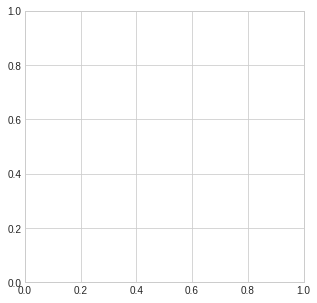

In [52]:
fig = plt.figure(figsize = (5, 5))
ax = plt.axes()

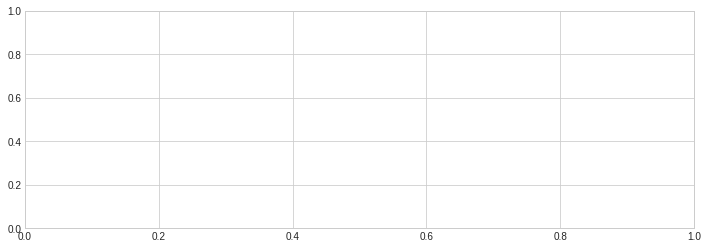

In [53]:
# variable ax pour un seul Axes
fig, ax = plt.subplots(figsize = (12, 4))

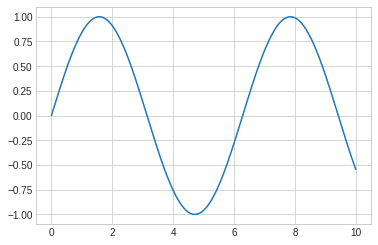

In [54]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 1000)

# le point virgule permet simplement de ne pas imprimer d'output
ax.plot(x, np.sin(x));

Un exemple plus complexe :

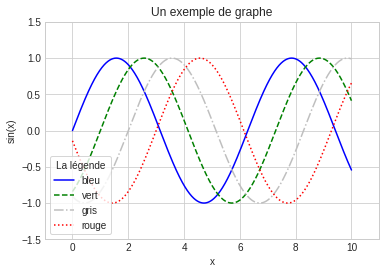

In [55]:
fig, ax = plt.subplots()

# Couleur spécifiée par son nom, ligne solide
ax.plot(x, np.sin(x - 0), color='blue', linestyle='solid', label='bleu')

# Nom court pour la couleur, ligne avec des traits
ax.plot(x, np.sin(x - 1), color='g', linestyle='dashed', label='vert')

# Valeur de gris entre 0 et 1, des traits et des points
ax.plot(x, np.sin(x - 2), color='0.75', linestyle='dashdot', label='gris')

# Couleur spécifié en RGB, avec des points
ax.plot(x, np.sin(x - 3), color='#FF0000', linestyle='dotted', label='rouge')

# Les limites des axes, essayez aussi les arguments 'tight' et 'equal' 
# pour voir leur effet
ax.axis([-1, 11, -1.5, 1.5]);

# titre et labels
ax.set(title="Un exemple de graphe",
       xlabel="x", 
       ylabel="sin(x)")

# La légende est générée à partir de l'argument label de la fonction
# plot. L'argument loc spécifie le placement de la légende
ax.legend(loc='lower left', title="La légende", frameon=True);

### Légende

* Par défaut la légende est superposée au graphe
* On peut la mettre où on veut avec `bbox_to_anchor`. Voir la documentation de `legend()`
* Voir <https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot>

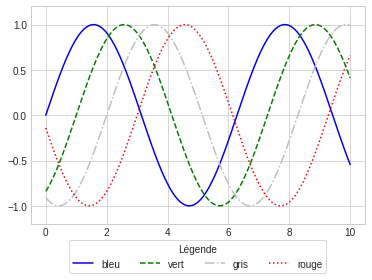

In [56]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x - 0), color='blue', linestyle='solid', label='bleu')
ax.plot(x, np.sin(x - 1), color='g', linestyle='dashed', label='vert')
ax.plot(x, np.sin(x - 2), color='0.75', linestyle='dashdot', label='gris')
ax.plot(x, np.sin(x - 3), color='#FF0000', linestyle='dotted', label='rouge')

ax.axis([-0.5, 10.5, -1.2, 1.2]);

# On met la légende en dessous
# place le centre haut de la légende en (0.5, -0.05)
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, -0.05), 
          ncol=4, 
          title="Légende",
          frameon=True);

### Sous graphes

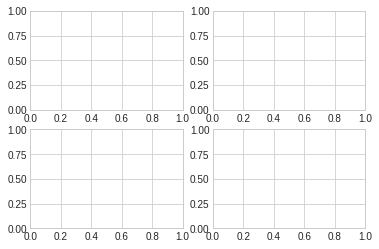

In [57]:
# variable axs pour plusieurs Axes
# ici axs est un array d'Axes
fig, axs = plt.subplots(2, 2)

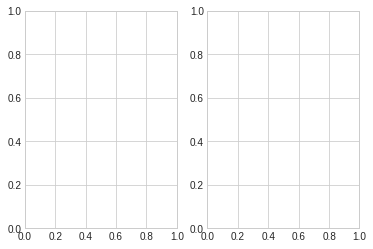

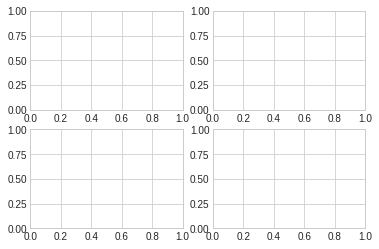

In [58]:
# avec tuple unpacking pour plusieurs Axes
fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

### Fonction maison pour faire un graphe

* La documentation Matplotlib recommande d'utiliser une signature qui ressemble à :

In [59]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

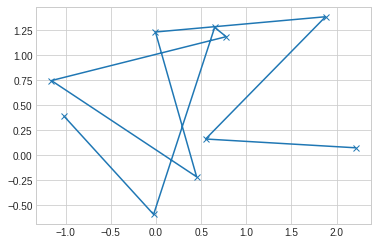

In [60]:
# randn : 2 échantillons de distribution normale
data1, data2 = np.random.randn(2, 10)

fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'});

## Seaborn



Documentation : <https://seaborn.pydata.org/>

Avantages par rapport à Matplotlib :

* plus joli
* plus de graphiques orientés statistiques que Matplotlib
* fonctions Matplotlib ne sont pas faites pour intérargir avec les Dataframes Pandas. Matplotlib travaille avec les array NumPy.
* Ressemble beaucoup à ggplot2, même philosophie de *tidy data*

### Des exemples

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [62]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### 2 variables continues

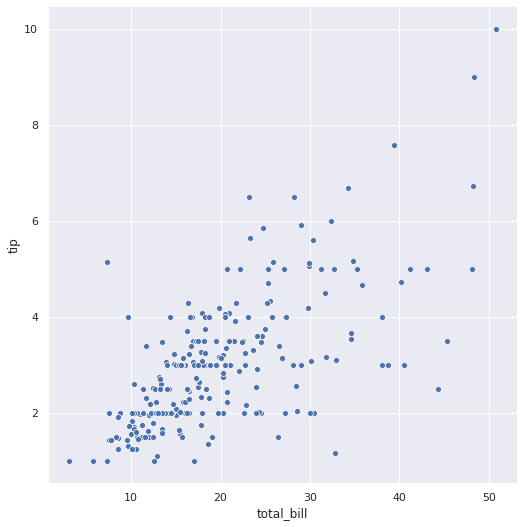

In [104]:
g = sns.relplot(x="total_bill", y="tip", data=tips)

# pour changer la taille du plot
g.fig.set_size_inches(8, 8)

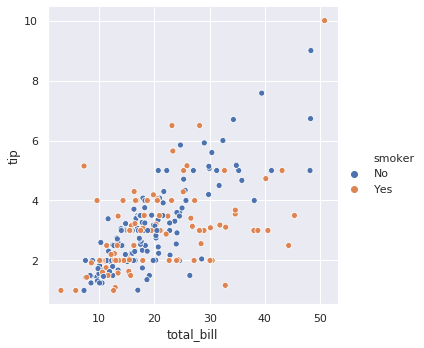

In [64]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

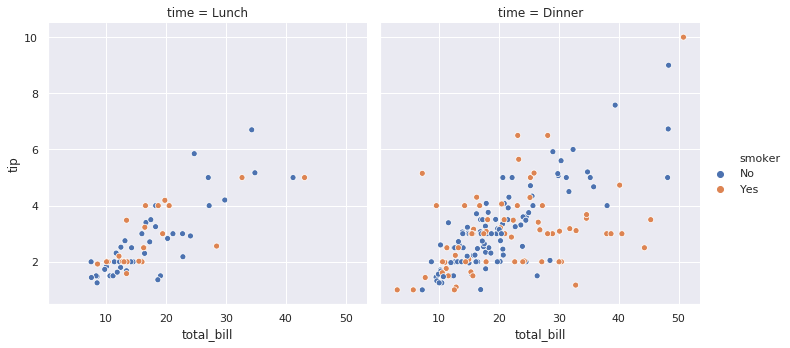

In [65]:
# même notion de facets que ggplot2
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", 
            data=tips);

#### 1 Variable continue, 1 variable qualitative

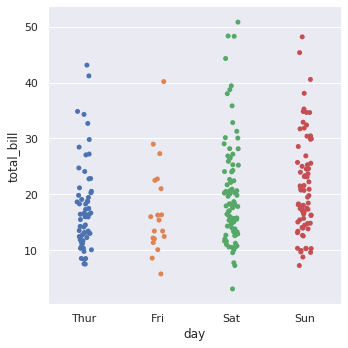

In [66]:
sns.catplot(x="day", y="total_bill", data=tips);

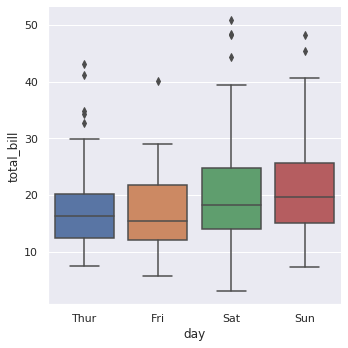

In [67]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

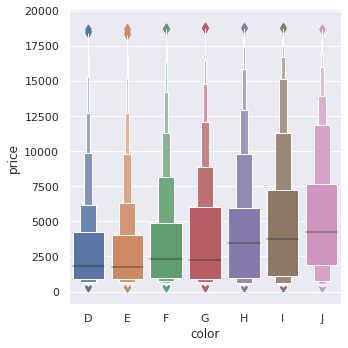

In [68]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

#### Distributions

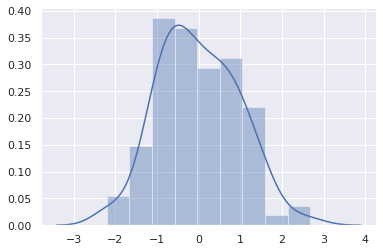

In [69]:
x = np.random.normal(size=100)
sns.distplot(x);

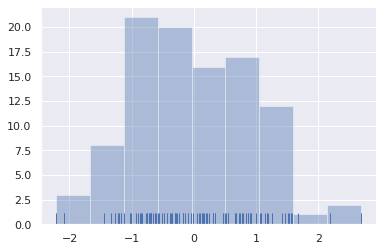

In [70]:
sns.distplot(x, kde=False, rug=True);

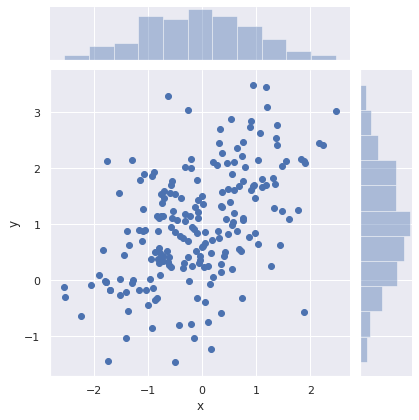

In [71]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

sns.jointplot(x="x", y="y", data=df);

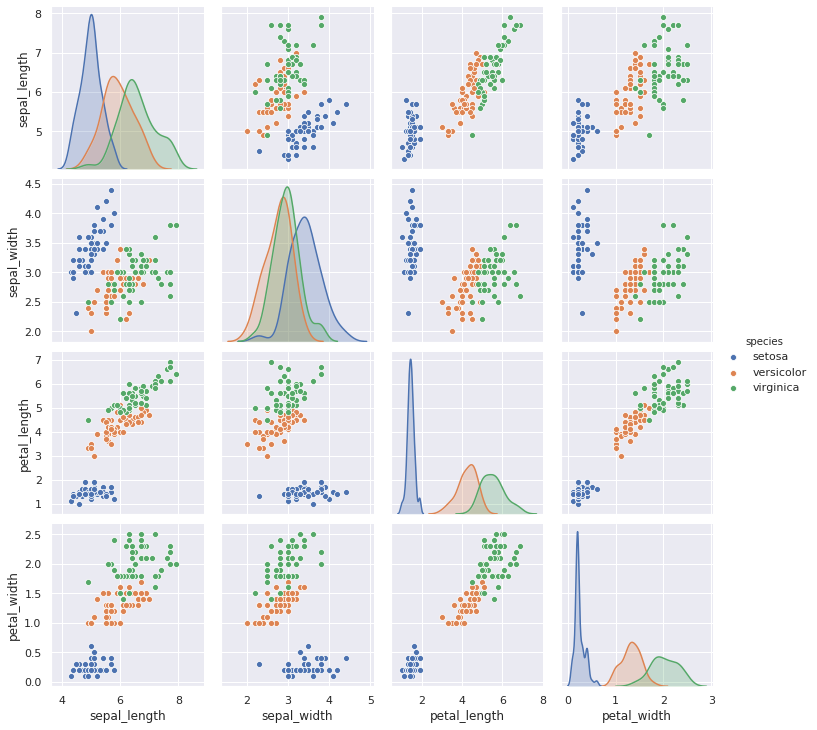

In [72]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species");

## Pandas

### Documentation 

* <https://pandas.pydata.org/>
* <https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html>

### Création de données

* objet de base le *DataFrame*
* création avec un *ndarray* ou dictionnaire en argument. Argument `index` pour spécifier des noms de lignes. Argument `columns` pour les noms de colonnes (pas besoin si dictionnaire).
* les noms des lignes sont appelés *index*, si on n'en donne pas, c'est suite d'entiers commençant par 0.
* une colonne d'un Dataframe est une *Series*. On peut créer une séries directement avec `pd.Series(liste_valeurs, name="series_name")`
* pour accéder aux valeurs de la *Series* : `df["column_name"].array`

In [1]:
import pandas as pd

df = pd.DataFrame({
    "Name": ["Braund, Mr. Owen Harris",
             "Allen, Mr. William Henry",
             "Bonnell, Miss. Elizabeth"],
    "Age": [22, 35, 58],
    "Sex": ["male", "male", "female"]
})

print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


In [7]:
print(type(df.Name))
df.Name

<class 'pandas.core.series.Series'>


0     Braund, Mr. Owen Harris
1    Allen, Mr. William Henry
2    Bonnell, Miss. Elizabeth
Name: Name, dtype: object

In [8]:
# Création avec des noms de lignes
X = pd.DataFrame({"X1": ["a", "b", "c"],
                  "X2": [1, 2, 3]},
                index = ["ligne_1", "ligne_2", "ligne_3"])
X

,X1,X2
ligne_1,a,1
ligne_2,b,2
ligne_3,c,3


In [9]:
# Création d'une series
ages = pd.Series([22, 35, 58], name="Age")

# accès aux valeurs
print(ages.array)

<PandasArray>
[22, 35, 58]
Length: 3, dtype: int64


### Voir les données

* taille du DataFrame : `df.shape`, renvoie un tuple (nombre de lignes, nombre de colonnes)
* les premières lignes avec `df.head()`
* les dernières lignes avec `df.tail()`
* les noms de lignes avec `df.index`
* les noms de colonnes : `df.columns`
* `df.describe()` donne un bref résumé statistique des variables numériques
* `df.T` transpose les données
* `df.sort_index()` permet d'ordonner soit les lignes (noms des lignes) avec `axis = 0`, soit les colonnes (noms des colonnes) avec `axis = 1`
* `df.sort_values()` permet d'ordonner suivant les valeurs des colonnes

In [10]:
X.shape

(3, 2)

In [11]:
X.index

Index(['ligne_1', 'ligne_2', 'ligne_3'], dtype='object')

In [12]:
X.columns

Index(['X1', 'X2'], dtype='object')

In [13]:
X.describe()

,X2
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [14]:
X.sort_index(axis = 1, ascending=False)

,X2,X1
ligne_1,1,a
ligne_2,2,b
ligne_3,3,c


In [15]:
X.sort_values(by="X1", ascending=False)

,X1,X2
ligne_3,c,3
ligne_2,b,2
ligne_1,a,1


### Sélection

* accès à une colonne soit avec 
    + `df.column_name`
    + `df["column_name"]`
* `df[:5]` : slice sur les lignes
* `df[["une_col", "une_autre"]]` : sélection de colonnes
* sélection par label : `df.loc[]`
    + `df.loc["index_2"]` : sélection d'une ligne par son index
    + `df.loc[:, ["une_col", "une_autre"]]` : sélection de 2 colonnes par noms de colonne 
    + `df.loc[0, "une_col"]` : accès à une valeur
    + `df.at[0, "une_col"]` : équivalent du précédent
* sélection par indices : `df.iloc[]`
    + `df.iloc[1]` pour la deuxième ligne
    + `df.iloc[:5]` : les 5 premières lignes
    + `df.iloc[:, :2]` : les 2 premières colonnes
    + `df.iloc[1, 1]` : accès à une valeur
    + `df.iat[1, 1]` : équivalent au précédent
* masques : avec une Series ou un DataFrame de booléens
    + `df[df['A'] > 0]` : filtre par rapport aux valeurs d'une variable
    + `df[df > 0]` : sur tout le DataFrame
    + fonction `isin()` pour les observations dans un ensemble de valeurs  
    + `~` pour inverser le masque

In [16]:
# Accès à une colonne
df["Name"]

0     Braund, Mr. Owen Harris
1    Allen, Mr. William Henry
2    Bonnell, Miss. Elizabeth
Name: Name, dtype: object

In [17]:
# accès à une ligne
X.iloc[1]

X1    b
X2    2
Name: ligne_2, dtype: object

In [18]:
# accès à plusieurs lignes
X.iloc[:2]

,X1,X2
ligne_1,a,1
ligne_2,b,2


In [19]:
# ou simplement
X[:2]

,X1,X2
ligne_1,a,1
ligne_2,b,2


In [20]:
X.loc["ligne_2"]

X1    b
X2    2
Name: ligne_2, dtype: object

In [21]:
X.loc[["ligne_1", "ligne_2"]]

,X1,X2
ligne_1,a,1
ligne_2,b,2


In [22]:
# sélection de colonne par nom des colonnes
df[["Name", "Age"]]

,Name,Age
0,"Braund, Mr. Owen Harris",22
1,"Allen, Mr. William Henry",35
2,"Bonnell, Miss. Elizabeth",58


In [23]:
# accès à une donnée
df.at[0, "Name"]

'Braund, Mr. Owen Harris'

In [27]:
# filtre 
X[X["X1"] == "a"]

,X1,X2
ligne_1,a,1


In [28]:
X[X["X1"].isin(["a", "b"])]

,X1,X2
ligne_1,a,1
ligne_2,b,2


In [30]:
X[~(X["X1"] == "a")]

,X1,X2
ligne_2,b,2
ligne_3,c,3


### Itération sur les lignes

* méthode `iterrows()` renvoie à chaque itération dans une boucle `for` un tuple (index de la ligne, Series de la ligne) 

In [6]:
# Itération sur les lignes
for ind_line, val_line in df.iterrows():
    print("Voici la ligne %s :" % ind_line)
    print(val_line)
    print("--------------------")

Voici la ligne 0 :
Name    Braund, Mr. Owen Harris
Age                          22
Sex                        male
Name: 0, dtype: object
--------------------
Voici la ligne 1 :
Name    Allen, Mr. William Henry
Age                           35
Sex                         male
Name: 1, dtype: object
--------------------
Voici la ligne 2 :
Name    Bonnell, Miss. Elizabeth
Age                           58
Sex                       female
Name: 2, dtype: object
--------------------
